In [87]:
from math import log
import pandas as pd
import re
import io
from collections import Counter
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import community
import numpy as np
import nltk
import seaborn as sns
import itertools
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import word_tokenize
import random
import operator
# import louvain
import json, csv
from networkx.algorithms import bipartite
import requests
import PIL
from io import BytesIO
import folium
import imageio
import folium.plugins as plugins
from folium.plugins import FastMarkerCluster
import sklearn

plt.style.use('ggplot')
%matplotlib inline

from tqdm import tnrange, tqdm_notebook

In [2]:
data_Charlotte = pd.read_csv("data_Charlotte.csv")

random_network = pd.read_csv("random_network.csv")

In [3]:
a = list(random_network.business_id)
b = list(data_Charlotte.user_id)

list(set(a) & set(b))

['LCEeye3tvTOtcTUg61mf1Q']

In [4]:
delete_row = data_Charlotte[data_Charlotte.user_id == 'LCEeye3tvTOtcTUg61mf1Q'].index
data_Charlotte = data_Charlotte.drop(delete_row)

# Sentiment analysis on reviews

In [5]:
data_Charlotte['review_length'] = data_Charlotte.reviews.map(len)

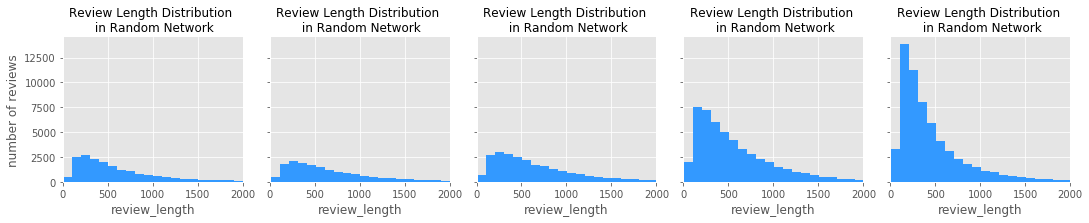

In [259]:
# check how the review lengths are distributed in random network
d = {'color': ['#3399ff', '#FFFF33', '#99FF66', '#3399FF', '#9999FF']}
ax = sns.FacetGrid(data = data_Charlotte, col='review_star', xlim=(0, 2000),hue_kws=d,).map(plt.hist, 'review_length', bins=50)
ax.axes[0][0].set(ylabel='number of reviews')
ax.set_titles('Review Length Distribution \n in Random Network')
ax.savefig('review length distribution for random network')

Random Network:

In [10]:
('gG9z6zr_49LocyCTvSFg0w', 2653),
('RAh9WCQAuocM7hYM5_6tnw', 2639),
('01fuY2NNscttoTxOYbuZXw', 2596),

(('01fuY2NNscttoTxOYbuZXw', 2596),)

# Word Cloud

In [211]:
tokenize_data_random1 = data_Charlotte[data_Charlotte.business_id == 'gG9z6zr_49LocyCTvSFg0w']

In [212]:
data_frame1 = tokenize_data_random1.to_csv (r'.\tokenize_data_random1.csv', index = None, header=True)

In [213]:
tokenize_data_random1 = pd.read_csv('tokenize_data_random1.csv')

In [214]:
random_document1 = []

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords = [s.lower() for s in stopWords]
my_stop_words = ["place"]
stopWords = list(stopWords) + my_stop_words

# This list is generated from repeated trying.
punctuation = set([".", ":", ",", "?", "!", ";", "%", "...", "n't"])

numbers = "[0-9]+"

for i in range(len(tokenize_data_random1)):
    
    # Tokenize
    sentence_tokenized = nltk.sent_tokenize(tokenize_data_random1.reviews[i])
    tokenized = []
    for sentence in sentence_tokenized:
        tokenized += nltk.word_tokenize(sentence)
    
    # Filter out stopwords,symbols and name without handle
    tokenized = filter(lambda x: x not in stopWords, tokenized)
    tokenized = filter(lambda x: re.search(numbers, x) is None, tokenized)
    tokenized = filter(lambda x: x not in punctuation, tokenized)
    
    random_document1 += tokenized

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [215]:
import math

random_doc1=random_document1
# Term frequency (TF)
freq_random1 = nltk.FreqDist(random_doc1)

        
# Unique words for each party

unique_random1 = set(random_doc1)
    

random_tdif1  = []
for n in unique_random1:
    n_t = 0
    if n in unique_random1:
        n_t = n_t+1
        
    word_idf = math.log10(2/n_t)    

    random_tdif1.append((n, freq_random1[n]*word_idf))

In [222]:
def random_color_func(word, font_size, position, orientation, random_state=None,
                       **kwargs):
        return "hsl(210, 100%, 60%)"

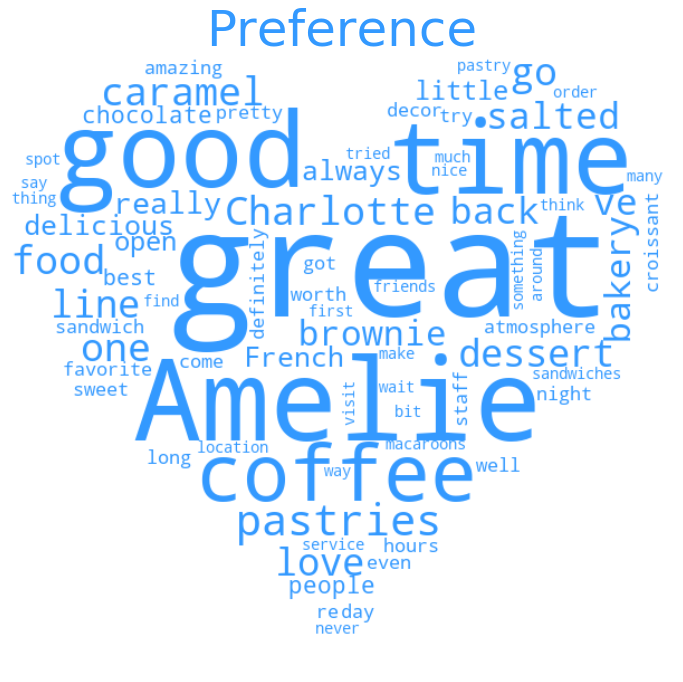

In [223]:
#prepare the mask
response = requests.get('https://i.ibb.co/gTBRtHC/heart.png')
mask = np.array(PIL.Image.open(BytesIO(response.content)))

#Republicans
sortedlist_random1 = sorted(random_tdif1, key = lambda x: x[1], reverse =True)
text = ""
for i in range(100):
    #print(sortedlist[i][0])
    text = text + int(sortedlist_random1[i][1])*(sortedlist_random1[i][0] + " ")
wc = WordCloud(background_color="white", max_words=300,  mask=mask, collocations = False)
wc.generate(text)


plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func = random_color_func, random_state=3), interpolation="bilinear")
plt.title('Preference', fontsize = 50, color="#3399ff")
plt.axis("off")

plt.savefig("random_preference1.png", dpi = 400)

plt.show()

In [224]:
tokenize_data_random2 = data_Charlotte[data_Charlotte.business_id == 'RAh9WCQAuocM7hYM5_6tnw']

In [225]:
data_frame2 = tokenize_data_random2.to_csv (r'.\tokenize_data_random2.csv', index = None, header=True)

In [226]:
tokenize_data_random2 = pd.read_csv('tokenize_data_random2.csv')

In [227]:
random_document2 = []

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords = [s.lower() for s in stopWords]
my_stop_words = ["place"]
stopWords = list(stopWords) + my_stop_words

# This list is generated from repeated trying.
punctuation = set([".", ":", ",", "?", "!", ";", "%", "...", "n't"])

numbers = "[0-9]+"

for i in range(len(tokenize_data_random2)):
    
    # Tokenize
    sentence_tokenized = nltk.sent_tokenize(tokenize_data_random2.reviews[i])
    tokenized = []
    for sentence in sentence_tokenized:
        tokenized += nltk.word_tokenize(sentence)
    
    # Filter out stopwords,symbols and name without handle
    tokenized = filter(lambda x: x not in stopWords, tokenized)
    tokenized = filter(lambda x: re.search(numbers, x) is None, tokenized)
    tokenized = filter(lambda x: x not in punctuation, tokenized)
    
    random_document2 += tokenized

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
import math

random_doc2=random_document2
# Term frequency (TF)
freq_random2 = nltk.FreqDist(random_doc2)

        
# Unique words for each party

unique_random2 = set(random_doc2)
    

random_tdif2  = []
for n in unique_random2:
    n_t = 0
    if n in unique_random2:
        n_t = n_t+1
        
    word_idf = math.log10(2/n_t)    

    random_tdif2.append((n, freq_random2[n]*word_idf))

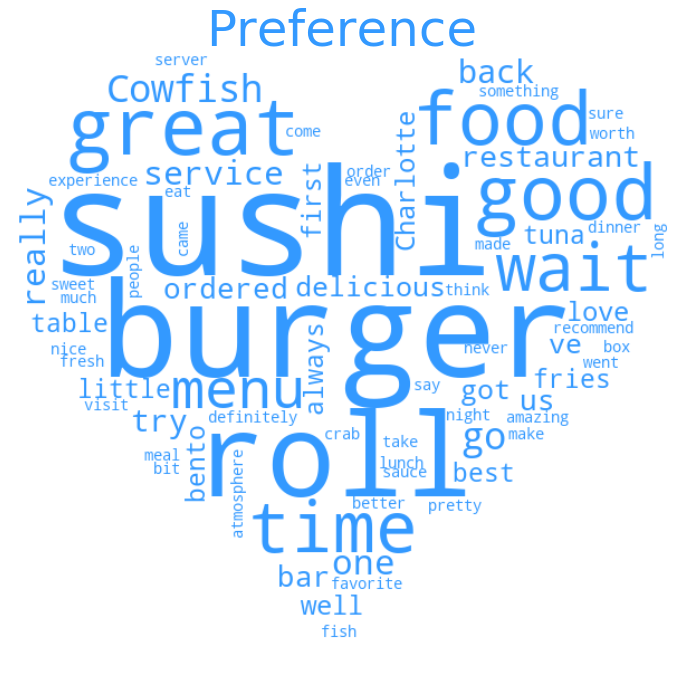

In [229]:
#prepare the mask
response = requests.get('https://i.ibb.co/gTBRtHC/heart.png')
mask = np.array(PIL.Image.open(BytesIO(response.content)))

#Republicans
sortedlist_random2 = sorted(random_tdif2, key = lambda x: x[1], reverse =True)
text = ""
for i in range(100):
    #print(sortedlist[i][0])
    text = text + int(sortedlist_random2[i][1])*(sortedlist_random2[i][0] + " ")
wc = WordCloud(background_color="white", max_words=300,  mask=mask, collocations = False)
wc.generate(text)


plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func = random_color_func, random_state=3), interpolation="bilinear")
plt.title('Preference', fontsize = 50, color="#3399FF")
plt.axis("off")

plt.savefig("random_preference2.png", dpi = 400)
plt.show()

In [230]:
tokenize_data_random3 = data_Charlotte[data_Charlotte.business_id == '01fuY2NNscttoTxOYbuZXw']

In [231]:
data_frame3 = tokenize_data_random.to_csv (r'.\tokenize_data_random3.csv', index = None, header=True)

In [232]:
tokenize_data_random3 = pd.read_csv('tokenize_data_random3.csv')

In [233]:
random_document3 = []

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
stopWords = [s.lower() for s in stopWords]
my_stop_words = ["place"]
stopWords = list(stopWords) + my_stop_words

# This list is generated from repeated trying.
punctuation = set([".", ":", ",", "?", "!", ";", "%", "...", "n't"])

numbers = "[0-9]+"

for i in range(len(tokenize_data_random3)):
    
    # Tokenize
    sentence_tokenized = nltk.sent_tokenize(tokenize_data_random3.reviews[i])
    tokenized = []
    for sentence in sentence_tokenized:
        tokenized += nltk.word_tokenize(sentence)
    
    # Filter out stopwords,symbols and name without handle
    tokenized = filter(lambda x: x not in stopWords, tokenized)
    tokenized = filter(lambda x: re.search(numbers, x) is None, tokenized)
    tokenized = filter(lambda x: x not in punctuation, tokenized)
    
    random_document3 += tokenized

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
import math

random_doc3=random_document3
# Term frequency (TF)
freq_random3 = nltk.FreqDist(random_doc3)

        
# Unique words for each party

unique_random3 = set(random_doc3)
    

random_tdif3  = []
for n in unique_random3:
    n_t = 0
    if n in unique_random3:
        n_t = n_t+1
        
    word_idf = math.log10(2/n_t)    

    random_tdif3.append((n, freq_random3[n]*word_idf))

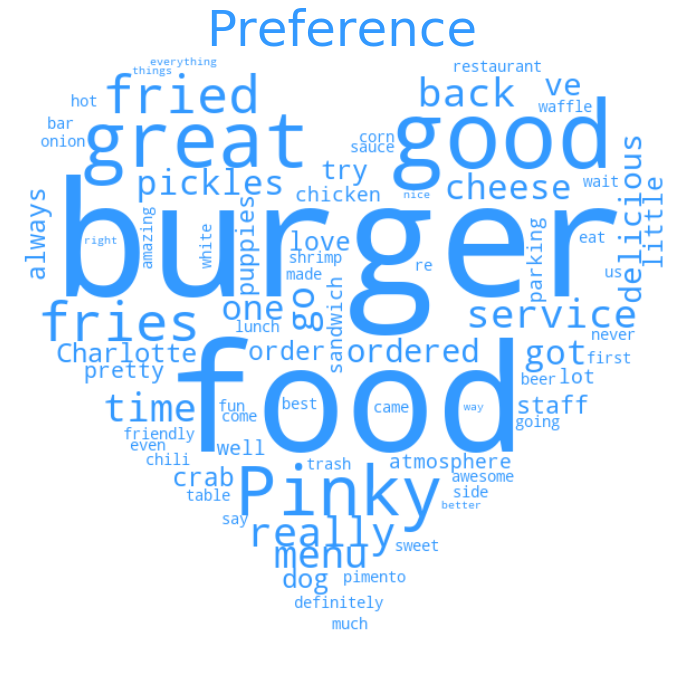

In [235]:
#prepare the mask
response = requests.get('https://i.ibb.co/gTBRtHC/heart.png')
mask = np.array(PIL.Image.open(BytesIO(response.content)))

#Republicans
sortedlist_random3 = sorted(random_tdif3, key = lambda x: x[1], reverse =True)
text = ""
for i in range(100):
    #print(sortedlist[i][0])
    text = text + int(sortedlist_random3[i][1])*(sortedlist_random3[i][0] + " ")
wc = WordCloud(background_color="white", max_words=300,  mask=mask, collocations = False)
wc.generate(text)


plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func = random_color_func, random_state=3), interpolation="bilinear")
plt.title('Preference', fontsize = 50, color="#3399FF")
plt.axis("off")
plt.savefig("random_preference3.png", dpi = 400)
plt.show()

In [305]:
tokenize_data_friend.reviews[1]

In [281]:
get_word_sentiment(random_network.reviews[1])
# positive_review = positive_review.sort()

Positive: ['Love', 'Amazing', 'great', 'clean', 'friendly', 'definitely', 'Cool', 'Pretty', 'good', 'Sure', 'satisfy', 'sweet', 'super', 'nice', 'sure', 'free', 'favorite', 'fresh', 'huge', 'delicious', 'Love', 'good', 'clean', 'pleasant', 'best', 'Clean', 'friendly']
Neutral: ['(', 'this', 'place', '!', 'frozen', 'yogurt', 'and', 'bubble', 'tea', '!', 'It', 'is', 'and', 'organized', 'inside', 'and', 'the', 'people', 'are', 'very', '.', 'I', 'will', 'be', 'visiting', 'So', 'several', 'times', 'this', 'summer', '.', ')', ',', '(', 'FroYo', 'place', 'with', 'all', 'the', 'toppings', 'and', 'Bubble', '(', 'Boba', ')', 'tea', 'options', '.', 'to', 'your', 'tooth', 'with', 'a', 'plethora', 'of', 'mix-ins', '.', 'Owners', 'are', '.', 'Be', 'to', 'pick', 'up', 'your', '``', 'Frequent', 'Flyer', "''", 'card', '...', '5oz', 'cup', 'after', 'every', '5', 'purchases', '.', ')', ',', '(', 'I', "'ve", 'never', 'had', 'the', 'frozen', 'yogurt', 'here', 'but', 'I', 'keep', 'coming', 'back', 'for', 't

In [282]:
sentiment_analyzer_scores(random_network.reviews[1])

(Love this place! Amazing frozen yogurt and great bubble tea! It is clean and organized inside and the people are very friendly. I will definitely be visiting So Cool several times this summer.),(Pretty good FroYo place with all the toppings and Bubble (Boba) tea options. Sure to satisfy your sweet tooth with a plethora of mix-ins. Owners are super nice. Be sure to pick up your "Frequent Flyer" card...free 5oz cup after every 5 purchases.),(I've never had the frozen yogurt here but I keep coming back for the bubble tea! I've had a lot of bubble teas in Charlotte and I've got to say that this is my favorite location. The owner uses fresh fruit and it makes a huge difference. Simply delicious!),(Love this place.  Frozen yogurt is so good.  We go almost once a week!  Shop is clean and staff is pleasant.),(Every time I have went their there was hair on my ice cream. There is always broken glass on the ground by the door.t's not the best place to eat but if you want ice cream be my guest.),

degree, rates, positive/negative

sentiment analysis

distance

define a function in which generate a recommendation list

In [7]:
('gG9z6zr_49LocyCTvSFg0w', 2653),
('RAh9WCQAuocM7hYM5_6tnw', 2639),
('01fuY2NNscttoTxOYbuZXw', 2596),

(('01fuY2NNscttoTxOYbuZXw', 2596),)

In [262]:
print(random_network[random_network.business_id == '01fuY2NNscttoTxOYbuZXw'].categories.values)

['Salad, American (Traditional), Restaurants, Burgers, Diners, Vegetarian']


In [8]:
random_network[random_network.business_id == 'gG9z6zr_49LocyCTvSFg0w']

,business_id,categories,city,is_open,latitude,longitude,name,review_count,restaurant_star,reviews
346,gG9z6zr_49LocyCTvSFg0w,"Restaurants, Coffee & Tea, Food, Cafes, Bakeri...",Charlotte,1,35.241145,-80.812057,AmÃ©lie's French Bakery & CafÃ©,1566,4.0,(Great place to stop by and a well crafted des...


In [9]:
random_network[random_network.business_id == 'RAh9WCQAuocM7hYM5_6tnw']

,business_id,categories,city,is_open,latitude,longitude,name,review_count,restaurant_star,reviews
684,RAh9WCQAuocM7hYM5_6tnw,"Sushi Bars, Restaurants, Asian Fusion, Burgers",Charlotte,1,35.152725,-80.827953,The Cowfish Sushi Burger Bar,1572,4.0,(I love cowfish! The staff at this location w...


In [10]:
random_network[random_network.business_id == '01fuY2NNscttoTxOYbuZXw']

,business_id,categories,city,is_open,latitude,longitude,name,review_count,restaurant_star,reviews
2763,01fuY2NNscttoTxOYbuZXw,"Salad, American (Traditional), Restaurants, Bu...",Charlotte,1,35.229128,-80.867464,Pinky's Westside Grill,991,4.0,(Brace yourself... I'm about to blow.your.mind...


In [11]:
random_data1 = data_Charlotte[data_Charlotte.business_id == 'gG9z6zr_49LocyCTvSFg0w']
random_data2 = data_Charlotte[data_Charlotte.business_id == 'RAh9WCQAuocM7hYM5_6tnw']
random_data3 = data_Charlotte[data_Charlotte.business_id == '01fuY2NNscttoTxOYbuZXw']
random_data = pd.concat([random_data1,random_data2,random_data3])


data_frame = random_data.to_csv (r'.\random_data.csv', index = None, header=True)

In [12]:
random_data = pd.read_csv('random_data.csv')

In [13]:
random_data.reviews.str.encode('ascii','ignore').str.decode('ascii')

0       Great place to stop by and a well crafted dess...
1       Aaaahhhh, Amelie's.  There is no other place i...
2       I've been a fan of Amelie's for awhile now. I ...
3       Fun atmospshere, delicious food. The macarons ...
4       I had a breakfast sandwich, and it was just ok...
5       Those soups though! I come back every weekend,...
6       Good coffee, good sandwiches, so-so desserts (...
7       once upon a time\nthere was a french bakery\no...
8       I will start by saying I am glad I live far fr...
9       Best BEC croissant I've ever had, consistently...
10      I'm so in love with their salted caramel brown...
11      One of the best places in Charlotte!! I just l...
12      I can't even begin to describe how AMAZING thi...
13      It is alright, nothing spectacular except that...
14      This place rocks its a Artsy French Bakery wit...
15      My favorite spot! Delicious Spinach Asparagus ...
16      I love the eclectic atmosphere. ..I also love ...
17      I love

In [14]:
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))

In [15]:
# initialize tokenizer
tokenizer = nltk.tokenize.TweetTokenizer()

# define function
def preprocessing(string):
    return tokenizer.tokenize(string.lower())

In [16]:
documents_random = random_data.reviews.apply(preprocessing)

In [17]:
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [18]:
random_data['positive_random'] = documents_random.apply(count_dictionary,dictionary=positive)
random_data['negative_random'] = documents_random.apply(count_dictionary,dictionary=negative)

In [19]:
# import nltk.sentiment
import nltk
nltk.download('vader_lexicon')
import nltk.sentiment
# initialize the vader function
vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()
# apply the function and convert to dataframe
vader_random = pd.DataFrame(list(random_data.reviews.apply(vader.polarity_scores)))
# rename columns adding the 'vader_' prefix using a list comprehension
vader_random.columns = ['vader_'+col for col in vader_random.columns]
# merge with original dataframe
random_data = pd.concat([random_data,vader_random],axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WEZHA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
#join_review_test = ''.join(str(test_data.reviews))

In [21]:
#join_review_test

In [22]:
from afinn import Afinn #importing one of the methods for sentiment analysis
afinn = Afinn()
random_data['afinn'] = random_data.reviews.apply(afinn.score)

C:\Users\WEZHA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\WEZHA\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


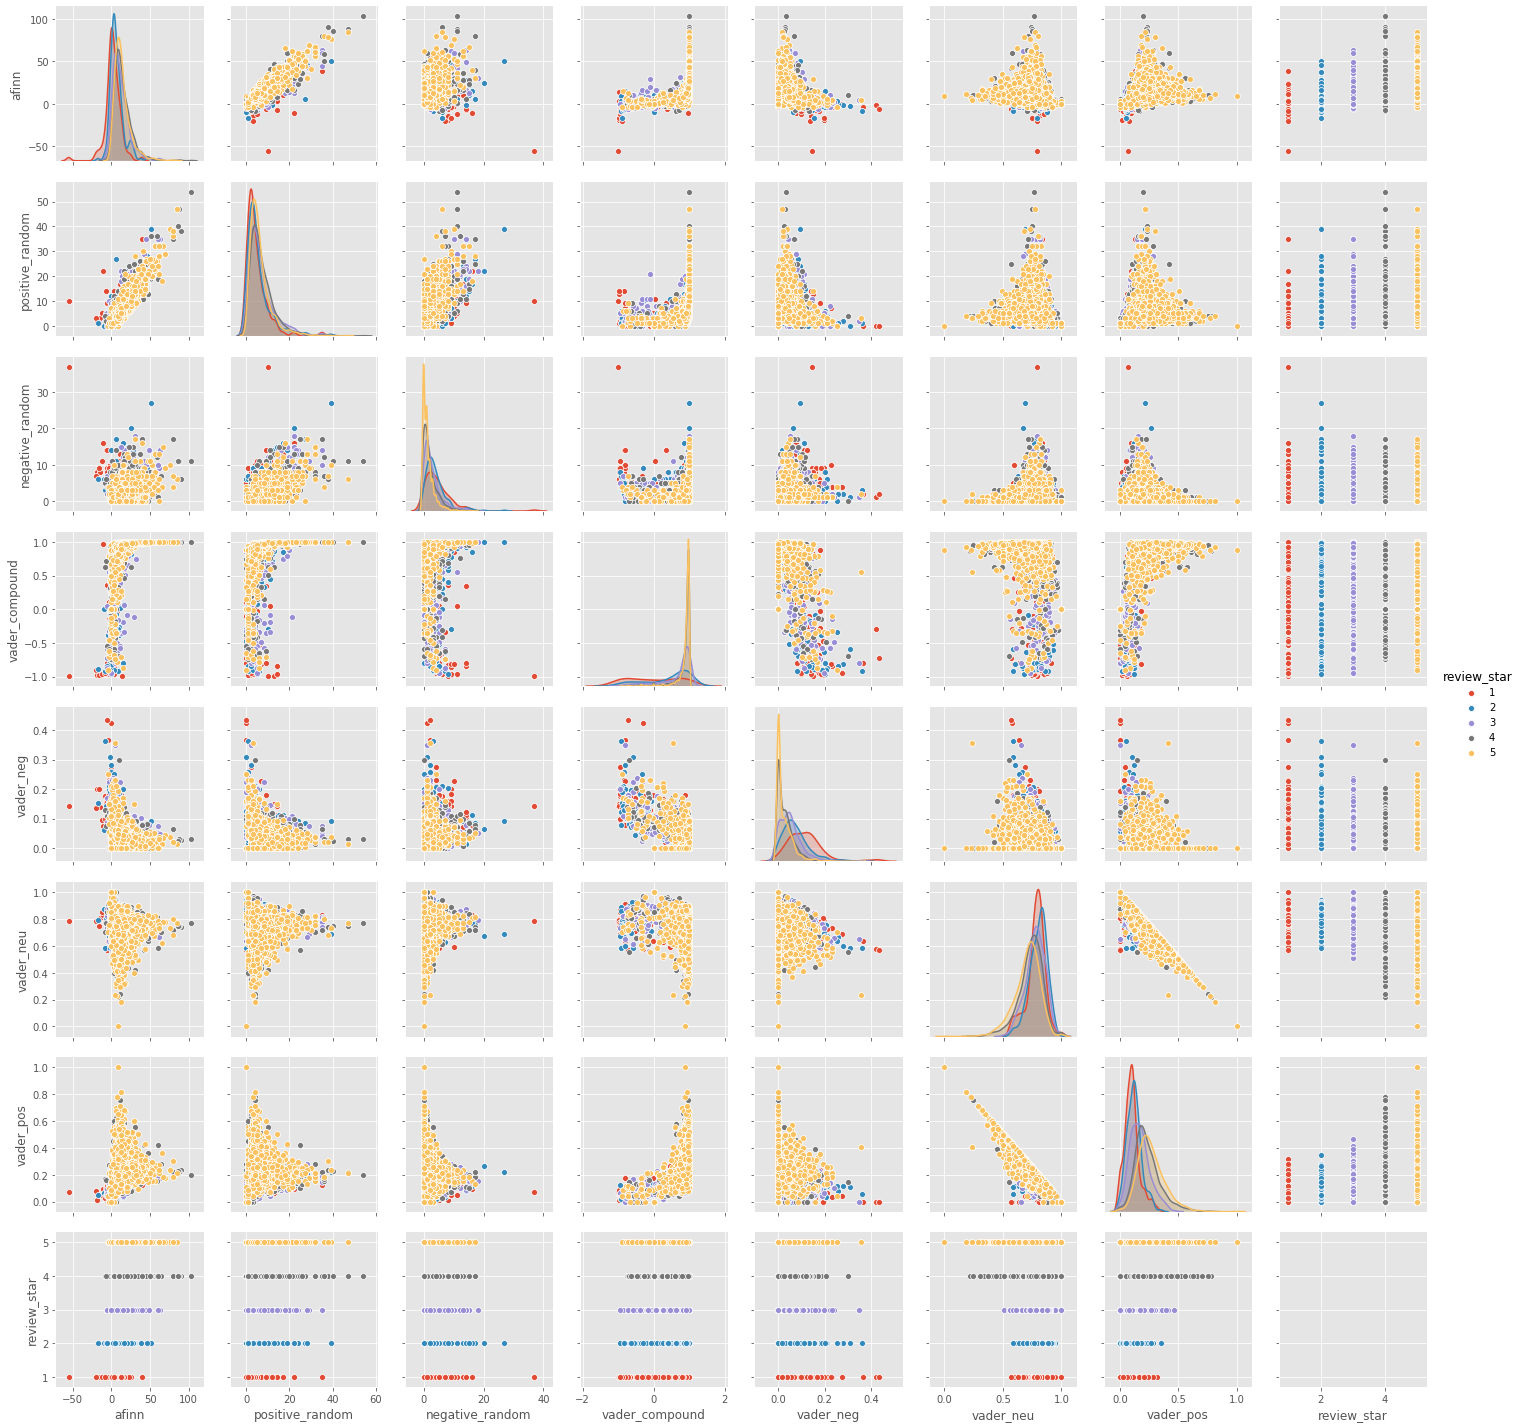

In [240]:
import seaborn as sns

# define columns
sentiment_columns_random = ['afinn','positive_random','negative_random']+[col for col in random_data.columns if 'vader_' in col]
hue = 'review_star'
sns_plot = sns.pairplot(random_data[sentiment_columns_random+[hue]],hue=hue)
#plt.title('Vader Review Sentiment Analysis for top 3 node with highest degree in Random Network')

sns_plot.savefig("random-network.png")

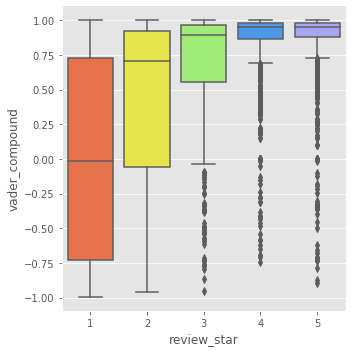

In [248]:
boxplot = sns.catplot(x="review_star", y="vader_compound", kind="box", data=random_data,palette=sns.color_palette(['#FF6633', '#FFFF33', '#99FF66', '#3399FF', '#9999FF']));

boxplot.savefig("random_review_boxplot.png")